In [58]:
#Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
import pickle
warnings.filterwarnings('ignore')

# Own modules and libraries
import estimators.v_information as v_information
import source.utils as ut
import source.pipes as op
import source.fairness as fm

import estimators.v_information as v_information
from scipy.stats import multivariate_normal

# Plot
import seaborn as sns
sns.set_theme(style="darkgrid")

In [59]:
data_sets = {}

DIR_DATA = {
    'dutch_census': 'data/dutch_census/',
    'census_income':'data/census_income/',
    'compas': 'data/compas/',
    'credit_card': 'data/credit_card/'
}

data_names = {    
    'dutch_census': 'DC',
    'census_income':'CI',
    'compas': 'CR',
    'credit_card': 'CC'}

model_names={
    'sgd_lr':'Linear', 
    'mlp_one_layer': '1MLP', 
    'mlp_two_layer':'2MLP',
    'mlp_three_layer': '3MLP'
}

for data in DIR_DATA:
    with open (DIR_DATA[data]+data+'.pkl', 'rb') as f:
        dic = pickle.load(f)
    
    data_sets[data] = dic

## Census Income

In [95]:
results = pd.read_csv(f'lower_bounded_results_census_income_onetrial.csv')
results

,dataset,family,pr(Y=1|S=mc),DP,"t(P(S=1), DP)",I_v(X_to_S)
0,census_income,sgd_lr,0.05,0.017352,0.000033,0.154123
1,census_income,mlp_one_layer,0.05,0.057945,0.000373,0.275232
2,census_income,mlp_two_layer,0.05,0.072888,0.000590,0.276614
3,census_income,mlp_three_layer,0.05,0.065972,0.000483,0.278565
4,census_income,sgd_lr,0.07,0.012472,0.000017,0.154344
...,...,...,...,...,...,...
179,census_income,mlp_three_layer,0.93,0.775627,0.067575,0.466978
180,census_income,sgd_lr,0.95,0.715435,0.057394,0.372324
181,census_income,mlp_one_layer,0.95,0.798295,0.071632,0.485325
182,census_income,mlp_two_layer,0.95,0.799860,0.071917,0.475138


In [96]:
result_census_income = pd.DataFrame()
for m in ['t(P(S=1), DP)', 'I_v(X_to_S)']:
    dataset = results[results['dataset']=='census_income']['dataset']
    model = results[results['dataset']=='census_income']['family']
    pr = results[results['dataset']=='census_income']['pr(Y=1|S=mc)']
    dem_p = results[results['dataset']=='census_income']['DP']
    estimate = results[results['dataset']=='census_income'][m]
    metric = [m]*len(results[results['dataset']=='census_income'])
    result_census_income = pd.concat([result_census_income, pd.DataFrame({'dataset': dataset, 
                                                                     'family': model, 
                                                                     'pr(Y=1|S=mc)': pr, 
                                                                     'DP': dem_p,
                                                                     'metric': metric,
                                                                     'discrimination risk \n estimation': estimate})], axis=0, ignore_index=True)

for m in model_names:
    result_census_income['family']=result_census_income['family'].replace(m, model_names[m])

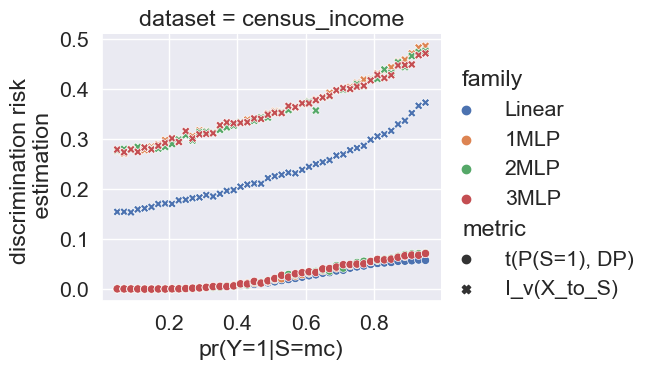

In [97]:
sns.set(font_scale=1.4)
sns.relplot(data=result_census_income, x='pr(Y=1|S=mc)', 
            y='discrimination risk \n estimation', 
            style='metric', 
            hue='family', 
            col='dataset', 
            facet_kws=dict(sharey=False, sharex=False),
            height=4, aspect=1.2)

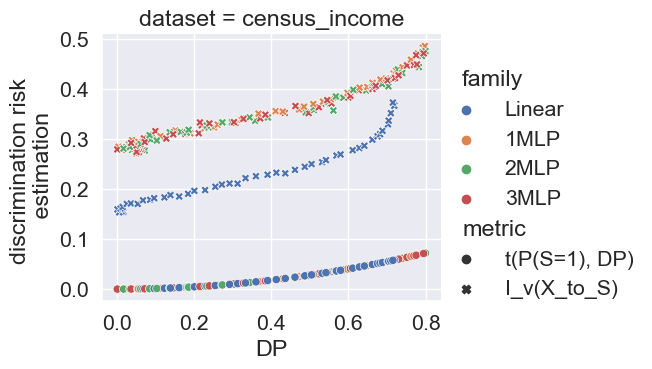

In [98]:
sns.set(font_scale=1.4)
sns.relplot(data=result_census_income, x='DP', 
            y='discrimination risk \n estimation', 
            style='metric', 
            hue='family', 
            col='dataset', 
            facet_kws=dict(sharey=False, sharex=False),
            height=4, aspect=1.2)

# 5 Trials

In [106]:
results = pd.read_csv(f'lower_bounded_results_all.csv')
results

,trial,dataset,family,pr(Y=1|S=mc),DP,"t(P(S=1), DP)","t(P(S=1), DP_ground_truth)",I_v(X_to_S)
0,1,credit_card,sgd_lr,0.05,0.002959,1.050000e-06,0.002976,0.010205
1,1,credit_card,mlp_one_layer,0.05,0.027825,9.260000e-05,0.002976,0.037239
2,1,credit_card,mlp_two_layer,0.05,0.043434,2.256760e-04,0.002976,0.052955
3,1,credit_card,mlp_three_layer,0.05,0.034061,1.387800e-04,0.002976,0.082223
4,1,credit_card,sgd_lr,0.07,0.002249,6.050000e-07,0.002234,0.009875
...,...,...,...,...,...,...,...,...
3675,5,census_income,mlp_three_layer,0.93,0.579661,3.746837e-02,0.043787,0.472047
3676,5,census_income,sgd_lr,0.95,0.599366,4.007690e-02,0.046368,0.351048
3677,5,census_income,mlp_one_layer,0.95,0.635431,4.508361e-02,0.046368,0.525104
3678,5,census_income,mlp_two_layer,0.95,0.600721,4.025959e-02,0.046368,0.475475


In [107]:
result_ds = pd.DataFrame()
for ds in DIR_DATA:
    dataset = results[results['dataset']==ds]['dataset']
    if len(dataset)>0:
        model = results[results['dataset']==ds]['family']
        pr = results[results['dataset']==ds]['pr(Y=1|S=mc)']
        dem_p = results[results['dataset']==ds]['DP']
        trials = results[results['dataset']==ds]['trial']
    for m in ['t(P(S=1), DP)', 'I_v(X_to_S)']:
            metric = [m]*len(results[results['dataset']==ds])
            estimate = results[results['dataset']==ds][m]
            result_ds = pd.concat([result_ds,
                                                pd.DataFrame({'dataset': dataset,
                                                                            'trials': trials,
                                                                            'family': model, 
                                                                            'pr(Y=1|S=mc)': pr, 
                                                                            'DP': dem_p,
                                                                            'metric': metric,
                                                                            'discrimination risk \n estimation': estimate})], ignore_index=True)
    
result_ds['family']=result_ds['family'].replace('sgd_lr', 'Linear').replace('mlp_one_layer', '1MLP').replace('mlp_two_layer', '2MLP').replace('mlp_three_layer', '3MLP')

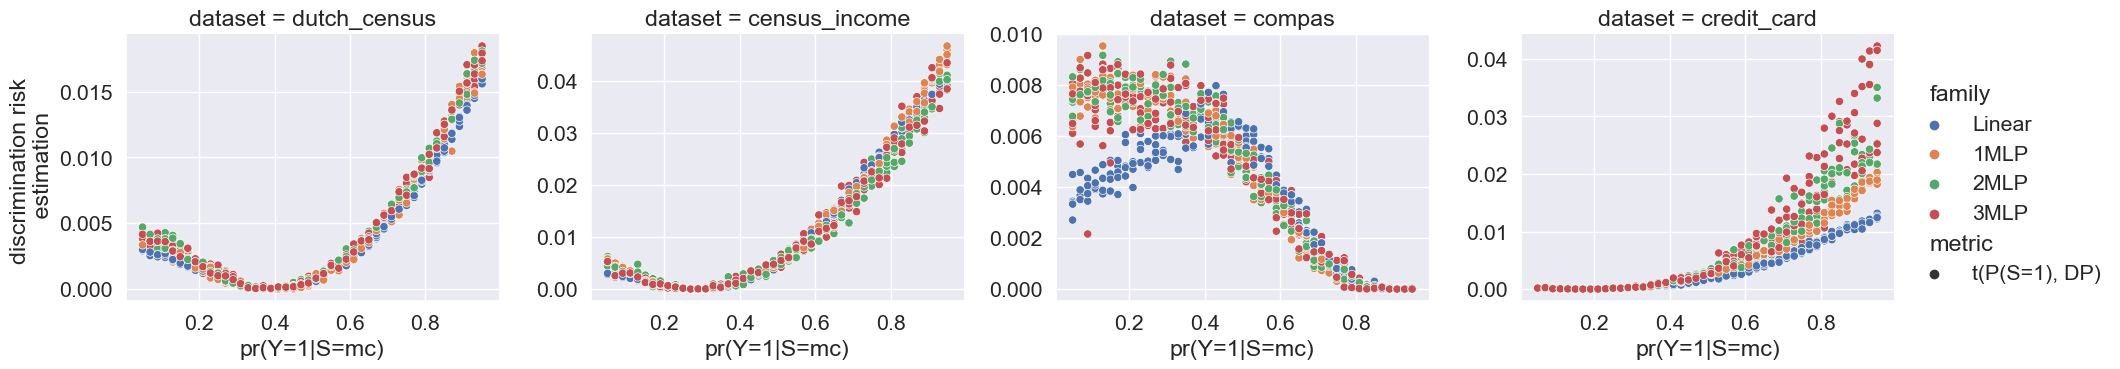

In [108]:
sns.set(font_scale=1.4)
sns.relplot(data=result_ds[result_ds['metric']=='t(P(S=1), DP)'], x='pr(Y=1|S=mc)', 
            y='discrimination risk \n estimation',  
            style='metric', 
            hue='family',
            col='dataset',
            facet_kws=dict(sharey=False, sharex=False),
            height=4, aspect=1.2)

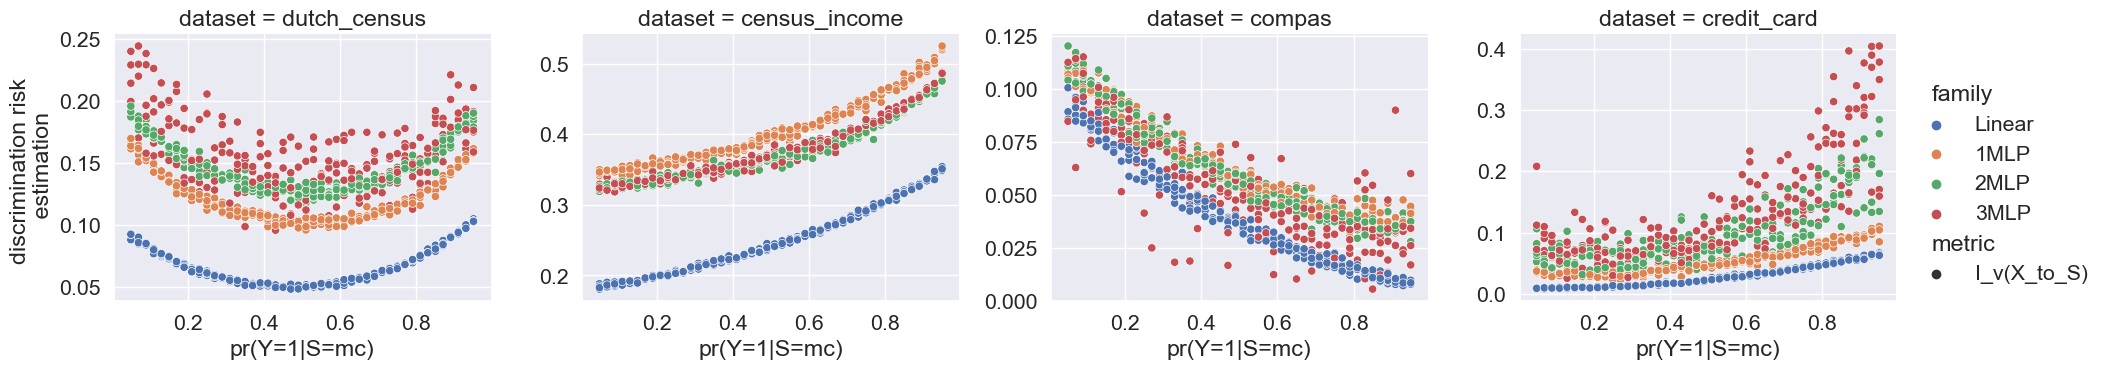

In [109]:
sns.set(font_scale=1.4)
sns.relplot(data=result_ds[result_ds['metric']=='I_v(X_to_S)'], x='pr(Y=1|S=mc)', 
            y='discrimination risk \n estimation',  
            style='metric', 
            hue='family',
            col='dataset',
            facet_kws=dict(sharey=False, sharex=False),
            height=4, aspect=1.2)